
*SQL City Murder Case* 


first we call the library we nned to run the data base

In [3]:
import sqlite3 as sql
import pandas as pd 
pd.set_option('display.max_colwidth', None)

In [4]:
con = sql.connect(r"D:\downloads\sql-murder-mystery.db")

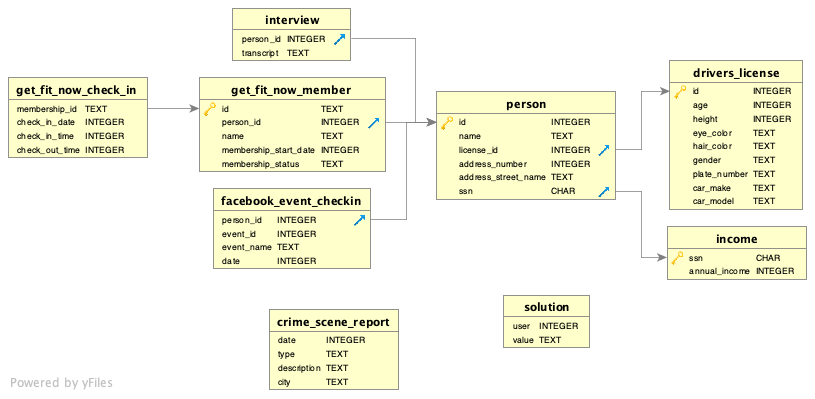

In [5]:
que="""
SELECT name 
  FROM sqlite_master
 where type = 'table'
"""
pd.read_sql_query(que, con)

,name
0,crime_scene_report
1,drivers_license
2,facebook_event_checkin
3,interview
4,get_fit_now_member
5,get_fit_now_check_in
6,solution
7,income
8,person


A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a murder that occurred sometime on Jan.15, 2018 and that it took place in SQL City. All the clues to this mystery are buried in a huge database, and you need to use SQL to navigate through this vast network of information. Your first step to solving the mystery is to retrieve the corresponding crime scene report from the police department’s database. Take a look at the cheatsheet to learn how to do this! From there, you can use your SQL skills to find the murderer

from the text above we notice that the crime took place in sql city 
and it is a murder and it happend on 15 jan 2018 so let query this info 

In [6]:
query1= """
SELECT *
FROM crime_scene_report
Where date = 20180115
"""

pd.read_sql_query(query1, con)

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his head...",Reno
3,20180115,theft,Big Bully stole my lunch money!,Chicago
4,20180115,fraud,"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do\n eiusmod tempor incididunt ut labore et dolore magna aliqua.",Seattle
5,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot him in the side! Yes he yields!",SQL City
6,20180115,assault,Report Not Found,SQL City
7,20180115,arson,"like a mouse, you know. But do cats eat bats, I wonder?’ And here Alice\n",San Buenaventura
8,20180115,bribery,"Here the other guinea-pig cheered, and was suppressed.\n",Marysville
9,20180115,fraud,"The Dormouse slowly opened his eyes. ‘I wasn’t asleep,’ he said in a\n",Yakima


In [7]:
query2 = """
SELECT *
FROM crime_scene_report
Where date = 20180115 
AND type = 'murder'
AND city = 'SQL City' 
"""

pd.read_sql_query(query2, con)

,date,type,description,city
0,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City


INTERSTING 2 witnesses first one we have his address but not his name 
and the second one we got his first name and his street with some sql magic we could find the full info 

In [8]:
query3 = """
SELECT *
FROM person
where address_street_name = 'Northwestern Dr'
order by address_number DESC
limit 1
"""

pd.read_sql_query(query3, con)

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


In [9]:
query4 = """
SELECT *
FROM person
where name like 'Annabel%'
AND address_street_name = 'Franklin Ave'

"""

pd.read_sql_query(query4, con)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


after we reached them lets see the interview report

In [10]:
query5 = """
SELECT *
FROM interview
Where person_id = 16371 or  person_id = 14887
"""
pd.read_sql_query(query5, con)

,person_id,transcript
0,14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W""."
1,16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."


so our killer is a gold member in git fit gym he must be after all his jop requiers a good body shape 

In [11]:
query6="""
SELECT * 
from get_fit_now_member
where membership_status = 'gold'
and id like '48Z%'
"""
pd.read_sql_query(query6, con)

,id,person_id,name,membership_start_date,membership_status
0,48Z7A,28819,Joe Germuska,20160305,gold
1,48Z55,67318,Jeremy Bowers,20160101,gold


now we have two suspects lets check for their time at the gym 

In [12]:
query7="""
SELECT *
from get_fit_now_check_in
where check_in_date = 20180109
and membership_id like '48Z%'
"""
pd.read_sql_query(query7, con)

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,20180109,1600,1730
1,48Z55,20180109,1530,1700


well they both checked in in jan 9 so we need to check their id

In [13]:
query9 ="""
SELECT *
from person
Where id in( '28819','67318')
"""
pd.read_sql_query(query9, con)

,id,name,license_id,address_number,address_street_name,ssn
0,28819,Joe Germuska,173289,111,Fisk Rd,138909730
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


now we see their license

In [14]:
query9 ="""
SELECT *
from drivers_license
Where gender = 'male'
and plate_number like '%H42W%'
"""
pd.read_sql_query(query9, con)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
1,664760,21,71,black,black,male,4H42WR,Nissan,Altima


back again to some sql magic where we use some conditions to find our killer

In [16]:
query10="""
SELECT person.id, person.name
FROM get_fit_now_check_in
JOIN get_fit_now_member
    ON get_fit_now_check_in.membership_id = get_fit_now_member.id
JOIN person
    ON get_fit_now_member.person_id = person.id
JOIN drivers_license
    ON person.license_id = drivers_license.id
WHERE get_fit_now_check_in.check_in_date = 20180109
    AND get_fit_now_member.id LIKE '48Z%'
    AND get_fit_now_member.membership_status = 'gold'
    AND drivers_license.gender = 'male'
    AND drivers_license.plate_number LIKE '%H42W%';
"""

pd.read_sql_query(query10, con)


,id,name
0,67318,Jeremy Bowers


after we got him let`s listen to what he has to say

In [17]:
query11 ="""
SELECT *
from interview
Where person_id=67318
"""
pd.read_sql_query(query11, con)

,person_id,transcript
0,67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n"


INTEARSTING AGAIN 
 THE VICTUM MUST BENN CHEATED ON HER

In [18]:
query12 = """
SELECT *, COUNT(*)
FROM facebook_event_checkin
WHERE date LIKE '201712%'
AND event_name = 'SQL Symphony Concert'
GROUP BY person_id
HAVING COUNT(*) = 3
ORDER BY person_id ASC;

"""
pd.read_sql_query(query12, con)

,person_id,event_id,event_name,date,COUNT(*)
0,24556,1143,SQL Symphony Concert,20171207,3
1,99716,1143,SQL Symphony Concert,20171206,3


In [19]:
query14= """
SELECT *
from person
where  id in ('24556','99716')
"""
pd.read_sql_query(query14, con)

,id,name,license_id,address_number,address_street_name,ssn
0,24556,Bryan Pardo,101191,703,Machine Ln,816663882
1,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


found two suspects again let`s narrow it down

In [20]:
query14= """
SELECT *
from drivers_license
where gender = 'female'
and hair_color ='red'
and car_make = 'Tesla'
and id in ('101191','202298')
"""
pd.read_sql_query(query14, con)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S


well we got the evil master mind behind the murder

In [21]:
query15 = """
SELECT person.name
FROM drivers_license
JOIN person
    ON drivers_license.id = person.license_id
JOIN facebook_event_checkin
    ON person.id = facebook_event_checkin.person_id
WHERE drivers_license.gender = 'female'
    AND drivers_license.height BETWEEN 65 AND 67
    AND drivers_license.hair_color = 'red'
    AND drivers_license.car_model = 'Model S'
    AND facebook_event_checkin.event_name = 'SQL Symphony Concert'
    AND facebook_event_checkin.date LIKE '201712%'
GROUP BY person.name
HAVING COUNT(*) = 3;
"""

pd.read_sql_query(query15, con)

,name
0,Miranda Priestly


**NOW WE CAN SAY :CASE SOLVED!!!!!!**